## U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases the performance of NSGA-III by introducing tournament pressure. 

The mating selections works as follows:


<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

In [1]:
from pymoo.optimize import minimize
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.factory import get_algorithm, get_problem

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(1, n_points=1).do()

# create the algorithm object
method = get_algorithm("unsga3",
                       pop_size=100,
                       ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("ackley", n_var=30),
               method,
               termination=('n_gen', 150),
               save_history=True)

print("UNSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

UNSGA3: Best solution found: 
X = [-0.06226914 -0.02635548  0.04835914  0.04587484 -0.00342836  0.04139137
 -0.11567079  0.05083335  0.04473939  0.03403337  0.02340945  0.14389873
 -0.09304084  0.0404682   0.11367175  0.04448061 -0.03074849  0.07353561
  0.04196297 -0.0241953  -0.08249494  0.06459475 -0.08846795 -0.05589083
 -0.04345742 -0.02807542 -0.02456324 -0.02577642 -0.06387265  0.00758406]
F = [0.43845635]


U-NSGA-III has for single- and bi-objective problems a tournament pressure which is known to be useful.
In the following we provide a quick comparison (here just one run, so not a valid experiment), to see the difference in convergence.

In [2]:
_res = minimize(get_problem("ackley", n_var=30),
                get_algorithm("nsga3", pop_size=100, ref_dirs=ref_dirs),
                termination=('n_gen', 150),
                save_history=True)
print("NSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

NSGA3: Best solution found: 
X = [-0.06226914 -0.02635548  0.04835914  0.04587484 -0.00342836  0.04139137
 -0.11567079  0.05083335  0.04473939  0.03403337  0.02340945  0.14389873
 -0.09304084  0.0404682   0.11367175  0.04448061 -0.03074849  0.07353561
  0.04196297 -0.0241953  -0.08249494  0.06459475 -0.08846795 -0.05589083
 -0.04345742 -0.02807542 -0.02456324 -0.02577642 -0.06387265  0.00758406]
F = [0.43845635]


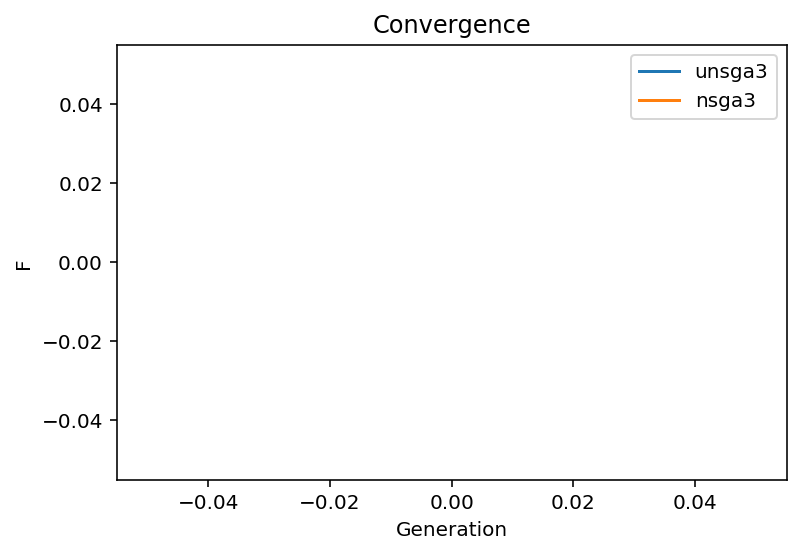

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ret = [np.min(e.pop.get("F")) for e in res.history]
_ret = [np.min(e.pop.get("F")) for e in _res.history]

plt.plot(np.arange(len(ret)), ret, label="unsga3")
plt.plot(np.arange(len(_ret)), _ret, label="nsga3")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()